In [22]:
agl=[]
aga=[]
asl=[]
asa=[]


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
data=pd.read_csv("C:\\Users\\pvshr\\Downloads\\dataset_LR.csv")    #,header=None

data.insert(0,0,[1 for i in range(len(data))],True)
data=data.to_numpy()

In [49]:
#7-3 spilt

import random
np.random.shuffle(data)
sp=int(0.7*len(data))
data_train=data[:sp]
data_test=data[sp:]


In [50]:
n=0.0001

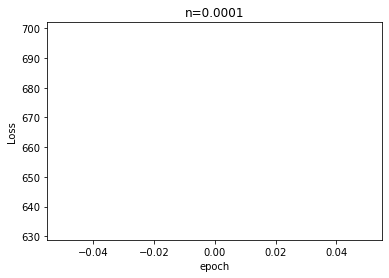

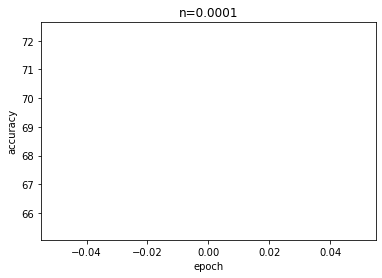

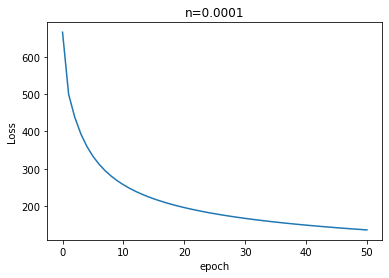

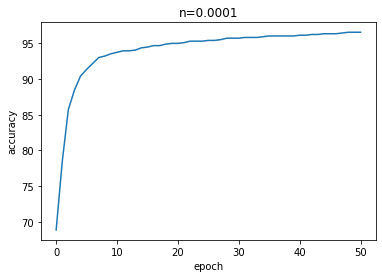

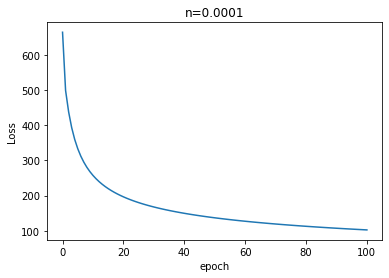

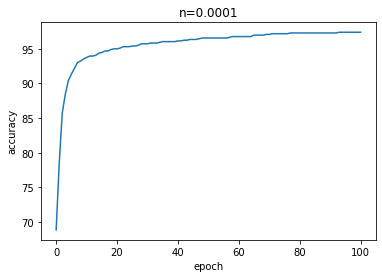

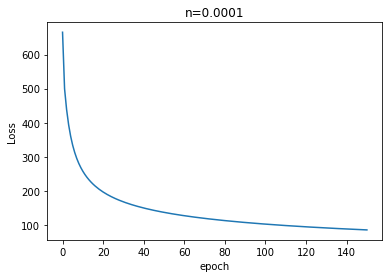

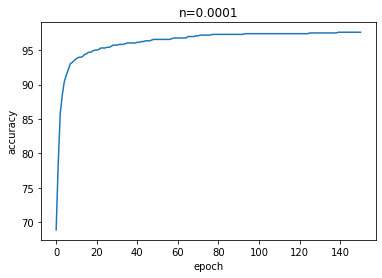

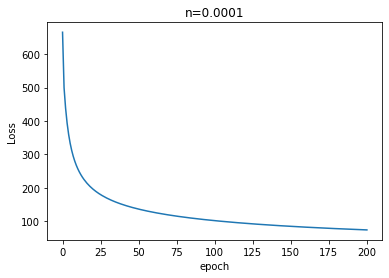

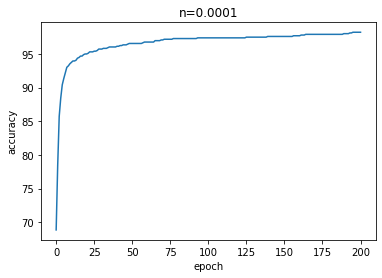

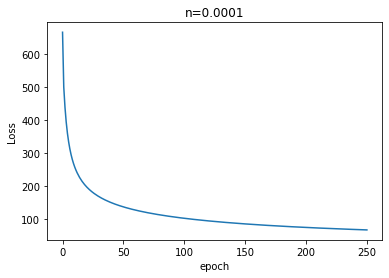

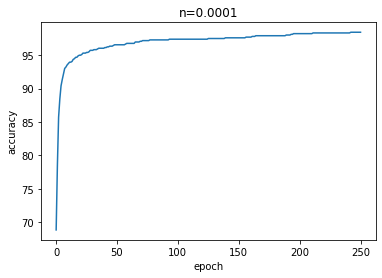

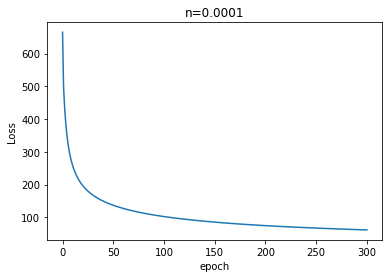

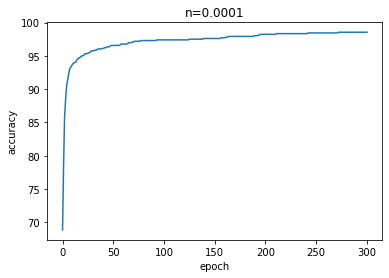

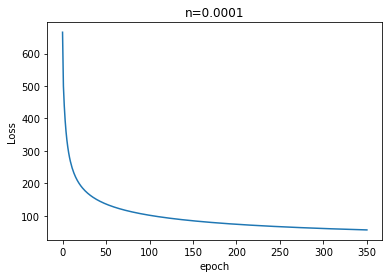

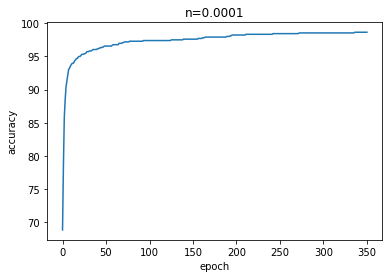

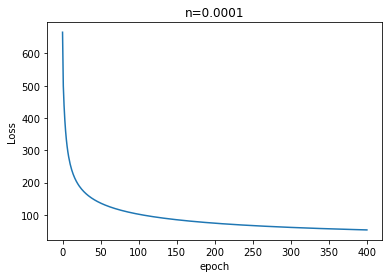

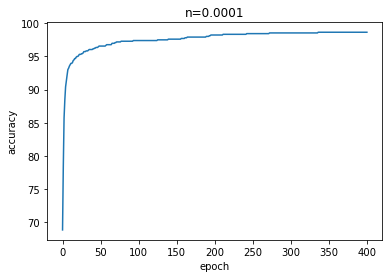

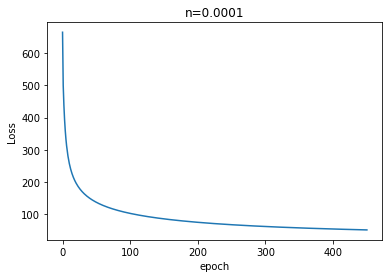

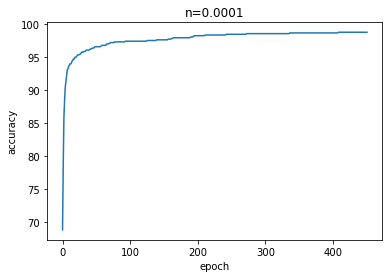

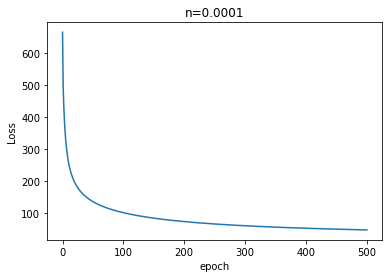

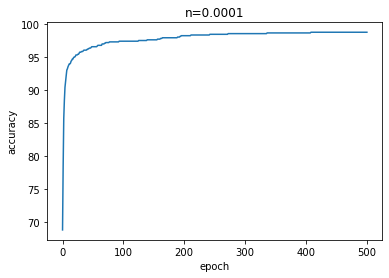

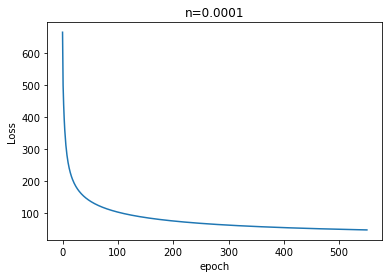

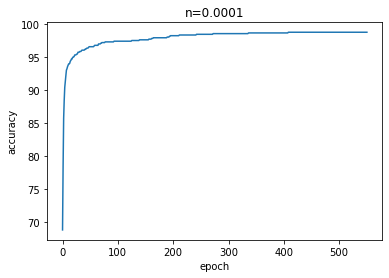

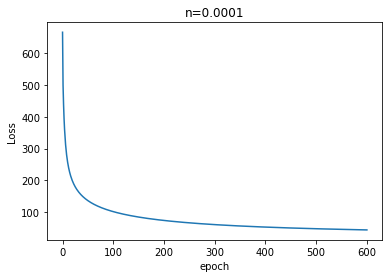

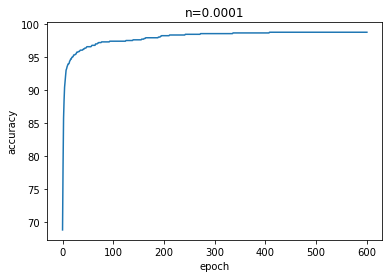

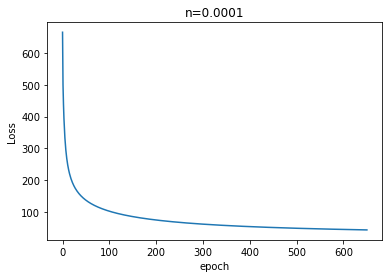

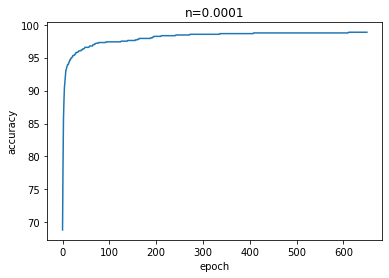

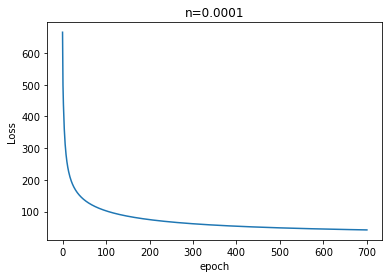

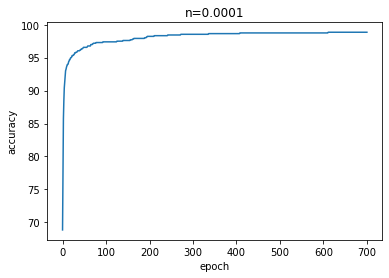

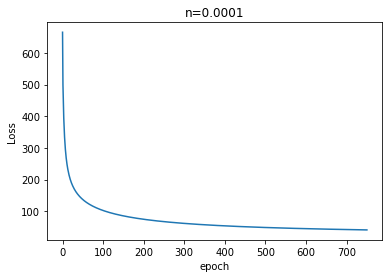

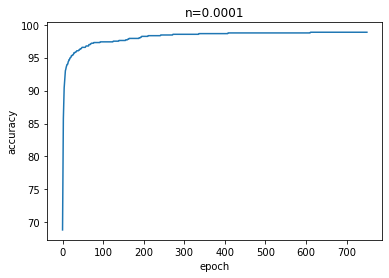

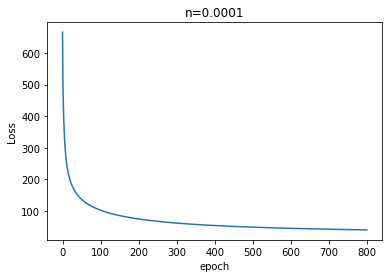

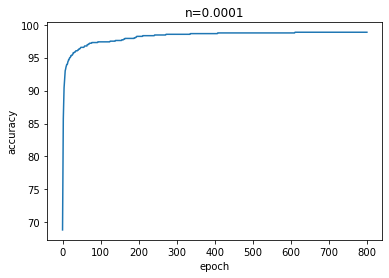

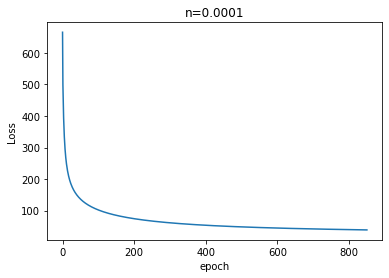

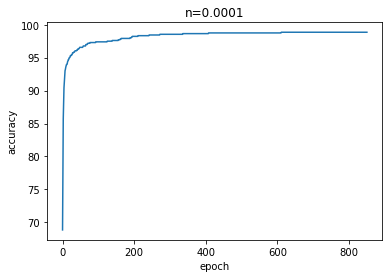

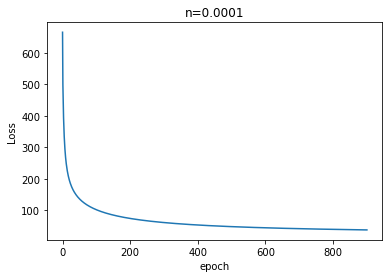

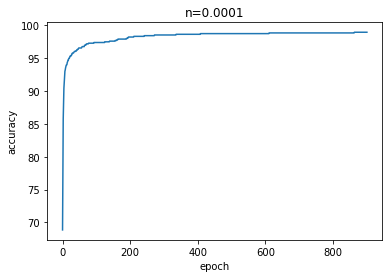

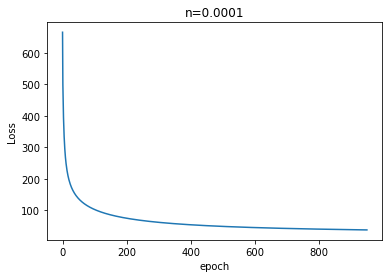

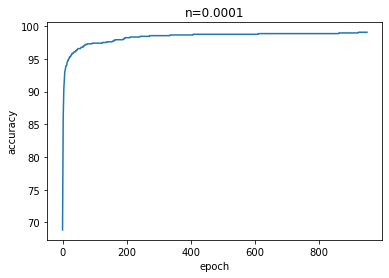

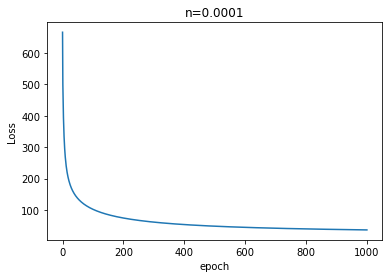

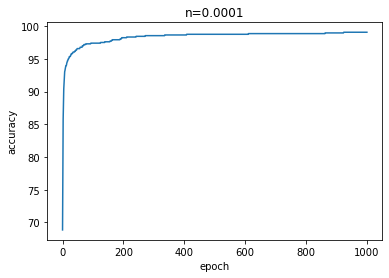

[ 2.20535476 -2.05441455 -1.28081669 -1.46327845 -0.23178404]
99.0625


In [51]:
#--------------------GD-------------------------------


import matplotlib.pyplot as plt
import math

w=[0,0,0,0,0]                  #
col=len(data[0][:])-1
row=len(data_train)
po=0
epp=1001
ewarr=[]


ash=[]
trainingacc=[]
for p in range(epp):
    
    ew=0
    e=[0,0,0,0,0]             
    for i in range(row):
        x=data_train[i][:-1]
        t=data_train[i][-1]
        num=sum([wi*xi for (xi,wi) in zip(x,w)])
        
        #po=math.exp(num)
        y=math.exp(num)/(1+math.exp(num))
        e=e+(y-t)*x
        
        eph=0.00000001
        a1=math.log(y+eph)
        a2=math.log(1-y+eph)
        ew=ew+t*a1+(1-t)*a2
        #print(e)
    w=w-n*e
    ewarr.append(-ew)
    cnt=0
    ash.append(p)
    
    
    for i in range(row):    # finding training accuracy
        x=data_train[i][:-1]
        t=data_train[i][-1]
        num=sum([wi*xi for (xi,wi) in zip(x,w)])
        #po=math.exp(-num)
        #y=1/(1+po)
        y=math.exp(num)/(1+math.exp(num))
        if y<0.5:
            y=0
        else:
            y=1
        if y==t:
            cnt=cnt+1
        #print(y)
    acc=cnt/row
    ans=acc*100
    trainingacc.append(ans)

    if p%50==0:
        plt.plot(ash,ewarr)
        plt.title('n=0.0001')
        plt.xlabel('epoch')
        plt.ylabel('Loss')
        plt.show()
        
        plt.plot(ash,trainingacc)
        plt.title('n=0.0001')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
        
        
print(w)
print(ans)
trainl=-ew





In [52]:
print(w)    #weights

[ 2.20535476 -2.05441455 -1.28081669 -1.46327845 -0.23178404]


In [53]:
#print(ewarr)

In [54]:
#GD test
yg=[0.0]*len(data_test)
row=len(data_test)
cnt=0
for i in range(row):
    
    x=data_test[i][:-1]
    t=data_test[i][-1]
    
    num=sum([wi*xi for (xi,wi) in zip(x,w)])
    
    po=math.exp(-num)
    y=1/(1+po)
    a1=math.log(y+eph)
    a2=math.log(1-y+eph)
    ew=ew+t*a1+(1-t)*a2
    if y<0.5:
        yg[i]=0
    else:
        yg[i]=1
    if yg[i]==t:
        cnt=cnt+1
    #print(y)

acc=cnt/row
ans=acc*100
print(ans)

testa=ans
testl=-ew

99.02912621359224


In [55]:
yt=[0.0]*len(data_test)
row=len(data_test)
cnt=0
for i in range(row):
    
    x=data_train[i][:-1]
    t=data_train[i][-1]
    
    num=sum([wi*xi for (xi,wi) in zip(x,w)])
    
    po=math.exp(-num)
    y=1/(1+po)
    if y<=0.5:
        yt[i]=0
    else:
        yt[i]=1
    if yt[i]==t:
        cnt=cnt+1
    #print(y)

acc=cnt/row
ans=acc*100
traina=ans

In [56]:
true_negative = 0
false_positive = 0
false_negative = 0
true_positive = 0
    
true_negative1 = 0
false_positive1 = 0
false_negative1 = 0
true_positive1 = 0



for i in range(len(yt)):
    if(yt[i] == 0 and data_train[i][-1] == 0):
        true_negative+=1
    if(yt[i] == 1 and data_train[i][-1] == 0):
        false_positive+=1
    if(yt[i] == 0 and data_train[i][-1] == 1):
        false_negative+=1 
    else:
        true_positive+=1
     


In [57]:
for i in range(len(data_test)):
    if(yg[i] == 0 and data_test[i][-1] == 0):
        true_negative1+=1
    if(yg[i] == 1 and data_test[i][-1] == 0):
        false_positive1+=1
    if(yg[i] == 0 and data_test[i][-1] == 1):
        false_negative1+=1 
    else:
        true_positive1+=1

In [58]:
aga.append(testa)
agl.append(testl)
print("Final GD Training Loss =",trainl)
print("Final GD Testing Loss =",testl)
print("Final GD Training Accuracy =",traina)
print("Final GD Testing Accuracy =",testa)
FTR = true_positive/(true_positive+false_negative)
FTR1 = true_positive1/(true_positive1+false_negative1)
print("Final GD Training Recall =",FTR)
print("Final GD Testing Recall =",FTR1)
    
FTP = true_positive/(true_positive+false_positive)
FTP1 = true_positive1/(true_positive1+false_positive1)
print("Final GD Training Precision =",FTP)
print("Final GD Testing Precision =",FTP1)
    
FTF = 2*(FTR*FTP)/(FTR+FTP)
FTF1 = 2*(FTR1*FTP1)/(FTR1+FTP1)
print("Final GD Training Fscore =",FTF)
print("Final GD Testing Fscore =",FTF1)

Final GD Training Loss = 36.65035174569694
Final GD Testing Loss = 50.63574174046873
Final GD Training Accuracy = 99.02912621359224
Final GD Testing Accuracy = 99.02912621359224
Final GD Training Recall = 0.9951456310679612
Final GD Testing Recall = 1.0
Final GD Training Precision = 0.9951456310679612
Final GD Testing Precision = 0.9903846153846154
Final GD Training Fscore = 0.9951456310679612
Final GD Testing Fscore = 0.9951690821256038


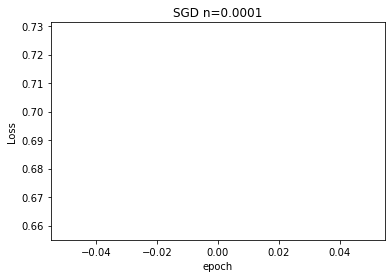

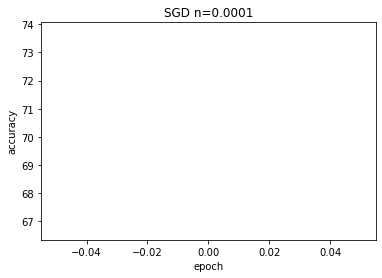

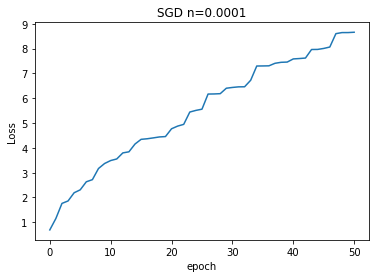

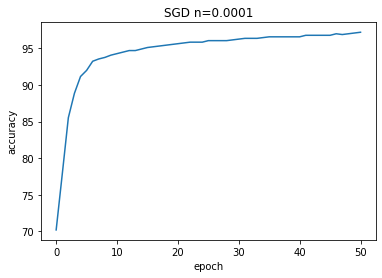

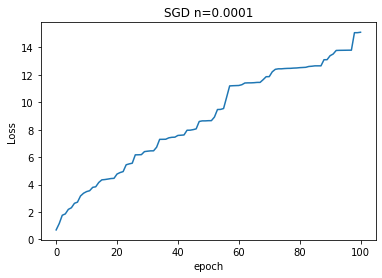

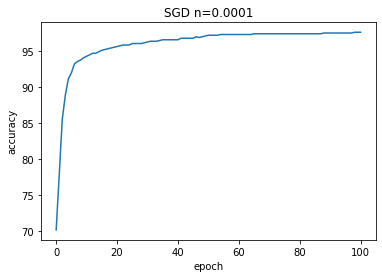

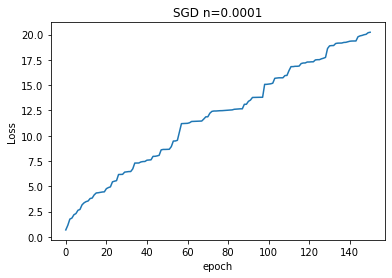

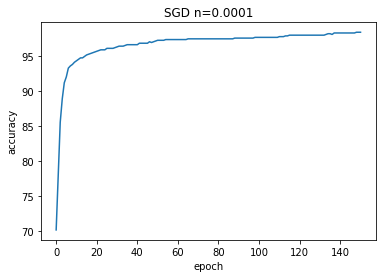

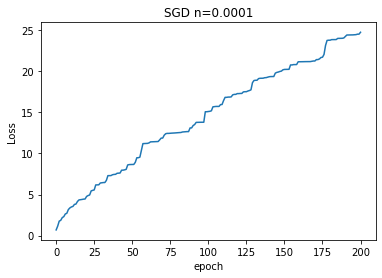

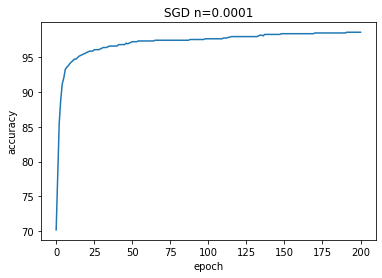

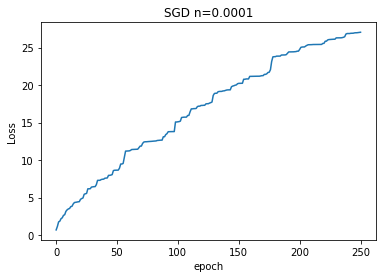

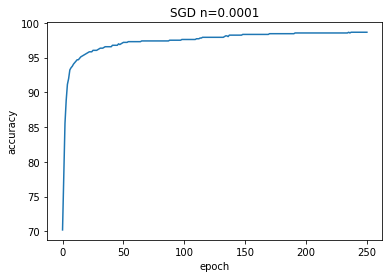

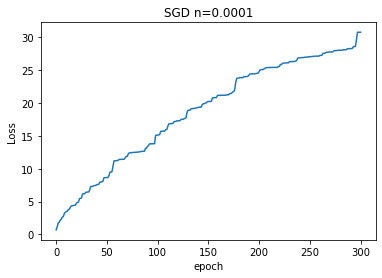

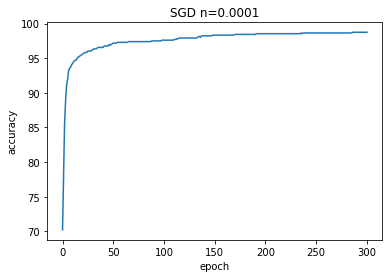

[ 1.49609245 -1.66055412 -1.01543866 -1.12732959 -0.27329951]


In [59]:
#------------------------------------------------SGD-----------------------------------------


import matplotlib.pyplot as plt
import math

w=[0,0,0,0,0]                  
col=len(data[0][:])-1
row=len(data_train)
po=0
epp=1372*300+1
ewar=[]
asht=[]
tracc=[]
j=0
ew=0
ne=0
for p in range(epp):
    e=[0,0,0,0,0]              
    
    x=data_train[j][:-1]
    t=data_train[j][-1]
    
    num=sum([wi*xi for (xi,wi) in zip(x,w)])
    
    po=math.exp(-num)
    y=1/(1+po)
    e=e+(y-t)*x
    w=w-n*e
    
    j=j+1
    if j==len(data_train):
        j=0
    
    
    cnt=0
    if p%1372==0:
        eph=0.00000001
        a1=math.log(y+eph)
        a2=math.log(1-y+eph)
        ew=ew+t*a1+(1-t)*a2
        ewar.append(-ew)
        asht.append(ne)
        ne=ne+1
        for i in range(row):
        
            x=data_train[i][:-1]
            t=data_train[i][-1]
            num=sum([wi*xi for (xi,wi) in zip(x,w)])
            po=math.exp(-num)
            y=1/(1+po)
            if y<=0.5:
                y=0
            elif y>0.5:
                y=1
        
            if y==t:
                cnt=cnt+1
            #print(y)
        acc=cnt/row
        ans=acc*100
        tracc.append(ans)
    
    
    if p%68600==0:      # 1372 x 50 = 68600
        plt.plot(asht,ewar)
        plt.title('SGD n=0.0001')
        plt.xlabel('epoch')
        plt.ylabel('Loss')
        plt.show()
        
        plt.plot(asht,tracc)
        plt.title('SGD n=0.0001')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
    
    
print(w)
trainl=-ew

In [60]:
print(w)     #weights

[ 1.49609245 -1.66055412 -1.01543866 -1.12732959 -0.27329951]


In [61]:
#SGD test
ys=[0.0]*len(data_test)
row=len(data_test)
cnt=0
ew=0
for i in range(row):
    
    x=data_test[i][:-1]
    t=data_test[i][-1]
    
    num=sum([wi*xi for (xi,wi) in zip(x,w)])
    
    po=math.exp(-num)
    y=1/(1+po)
    a1=math.log(y+eph)
    a2=math.log(1-y+eph)
    ew=ew+t*a1+(1-t)*a2
    if y<0.5:
        ys[i]=0
    else:
        ys[i]=1
    if ys[i]==t:
        cnt=cnt+1
    #print(y)
acc=cnt/row
ans=acc*100
print(ans)
testa=ans
testl=-ew

99.02912621359224


In [62]:
yt=[0.0]*len(data_test)
row=len(data_test)
cnt=0
for i in range(row):
    
    x=data_train[i][:-1]
    t=data_train[i][-1]
    
    num=sum([wi*xi for (xi,wi) in zip(x,w)])
    
    po=math.exp(-num)
    y=1/(1+po)
    if y<=0.5:
        yt[i]=0
    else:
        yt[i]=1
    if yt[i]==t:
        cnt=cnt+1
    #print(y)

acc=cnt/row
ans=acc*100
traina=ans

In [63]:
true_negative = 0
false_positive = 0
false_negative = 0
true_positive = 0
    
true_negative1 = 0
false_positive1 = 0
false_negative1 = 0
true_positive1 = 0



for i in range(len(yt)):
    if(yt[i] == 0 and data_train[i][-1] == 0):
        true_negative+=1
    if(yt[i] == 1 and data_train[i][-1] == 0):
        false_positive+=1
    if(yt[i] == 0 and data_train[i][-1] == 1):
        false_negative+=1 
    else:
        true_positive+=1
     


In [64]:
for i in range(len(data_test)):
    if(ys[i] == 0 and data_test[i][-1] == 0):
        true_negative1+=1
    if(ys[i] == 1 and data_test[i][-1] == 0):
        false_positive1+=1
    if(ys[i] == 0 and data_test[i][-1] == 1):
        false_negative1+=1 
    else:
        true_positive1+=1

In [65]:
asa.append(testa)
asl.append(testl)
print("Final SGD Training Loss =",trainl)
print("Final SGD Testing Loss =",testl)
print("Final SGD Training Accuracy =",traina)
print("Final SGD Testing Accuracy =",testa)
FTR = true_positive/(true_positive+false_negative)
FTR1 = true_positive1/(true_positive1+false_negative1)
print("Final SGD Training Recall =",FTR)
print("Final SGD Testing Recall =",FTR1)
    
FTP = true_positive/(true_positive+false_positive)
FTP1 = true_positive1/(true_positive1+false_positive1)
print("Final SGD Training Precision =",FTP)
print("Final SGD Testing Precision =",FTP1)
    
FTF = 2*(FTR*FTP)/(FTR+FTP)
FTF1 = 2*(FTR1*FTP1)/(FTR1+FTP1)
print("Final SGD Training Fscore =",FTF)
print("Final SGD Testing Fscore =",FTF1)

Final SGD Training Loss = 30.763350822001957
Final SGD Testing Loss = 19.421786234926845
Final SGD Training Accuracy = 99.02912621359224
Final SGD Testing Accuracy = 99.02912621359224
Final SGD Training Recall = 0.9951456310679612
Final SGD Testing Recall = 1.0
Final SGD Training Precision = 0.9951456310679612
Final SGD Testing Precision = 0.9903846153846154
Final SGD Training Fscore = 0.9951456310679612
Final SGD Testing Fscore = 0.9951690821256038


In [150]:
print("GD Loss over 10 random suffles")
print(agl)
print("GD Accuracy over 10 random suffles")
print(aga)
print("SGD Loss over 10 random suffles")
print(asl)
print("SGD Accuracy over 10 random suffles")
print(asa)

GD Loss over 10 random suffles
[51.299892659206805, 51.01143315945137, 51.37260911044002, 51.2773795337403, 51.53266751564609, 50.4687128496655, 50.59775248509341, 50.896791958889864, 51.01963372043649, 51.485709822931874]
GD Accuracy over 10 random suffles
[99.27184466019418, 99.27184466019418, 99.02912621359224, 99.51456310679612, 99.02912621359224, 98.7864077669903, 99.02912621359224, 99.51456310679612, 98.54368932038835, 98.30097087378641]
SGD Loss over 10 random suffles
[22.1805198312804, 20.878965222258646, 21.88558895367408, 20.45041275093075, 23.449951715560758, 20.42508696119224, 20.65808421529229, 19.243284264098, 24.810480709937732, 25.25962210781218]
SGD Accuracy over 10 random suffles
[99.02912621359224, 99.27184466019418, 98.54368932038835, 99.27184466019418, 98.7864077669903, 98.54368932038835, 99.02912621359224, 99.27184466019418, 98.30097087378641, 98.30097087378641]


In [151]:
def Aveg(lst):
    return sum(lst) / len(lst)

In [152]:
print("Average GD Loss over 10 random suffles ",Aveg(agl))
print("Average SGD Loss over 10 random suffles ",Aveg(asl))
print("Average GD Accuracy over 10 random suffles ",Aveg(aga))
print("Average SGD Accuracy over 10 random suffles ",Aveg(asa))

Average GD Loss over 10 random suffles  51.09625828155018
Average SGD Loss over 10 random suffles  21.92419967320371
Average GD Accuracy over 10 random suffles  99.02912621359224
Average SGD Accuracy over 10 random suffles  98.83495145631066
